# Refine Feature Groups into Final Bins

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
from zotbin.group import load_groups

In [7]:
fedges, grpid, zhist, zsim = load_groups('groups_16_120_200.npz')

In [8]:
from zotbin.binned import *

In [9]:
init_data = load_binned('binned_28.npz')

In [19]:
def combine(group_weights):
    ngrp, nzbin = zhist.shape
    nbin = len(group_weights)
    assert group_weights.shape[1] == ngrp
    zhist_out = group_weights.dot(zhist)
    plt.plot(zhist_out.T)

## Method 1

Keep the groups in their mean-redshift sorted order and find the breakpoints with the maximum score using an exhaustive search:

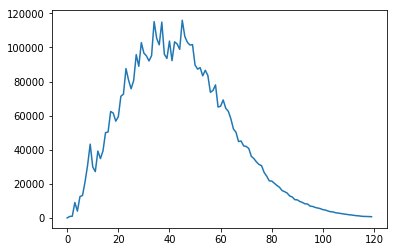

In [26]:
def method1_bins(*breaks):

    ngrp, nzbin = zhist.shape
    nbin = len(breaks) + 1
    w = np.zeros((nbin, ngrp))
    breaks = np.concatenate(([0], breaks, [ngrp]))
    assert np.all(np.diff(breaks) > 0)
    igrp = np.arange(ngrp)
    for i in range(nbin):
        sel = (breaks[i] <= igrp) & (igrp < breaks[i + 1])
        w[i, sel] = 1.
    return combine(w)
    
method1_bins()